In [2]:
import pandas as pd
file=pd.read_csv("C:\\Users\\hp\\Desktop\\heart-disease-uci\\heart.csv")
dataset=pd.DataFrame(file)
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
dataset.shape

(303, 14)

In [4]:
dataset.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
X=dataset.drop(columns=['target'])


In [9]:
y=dataset["target"]

In [10]:
from sklearn.model_selection import train_test_split
import time
start = time.time()
end = time.time()

In [77]:
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=1,stratify=y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [78]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

In [80]:
model=MultinomialNB().fit(x_train,y_train)
model_1=BernoulliNB().fit(x_train,y_train)
model_2=GaussianNB().fit(x_train,y_train)
print(end - start)

0.0


In [82]:
from sklearn.metrics import classification_report
a=model.predict(x_test)

In [56]:
scr=model.score(x_test,y_test)*100
sc_1=model_1.score(x_test,y_test)*100
scr_2=model_2.score(x_test,y_test)*100
print("Multi:{}\nBer:{}\nGaus:{}".format(scr,sc_1,scr_2))

Multi:75.82417582417582
Ber:86.81318681318682
Gaus:81.31868131868131


In [57]:
print(classification_report(y_test,a))

              precision    recall  f1-score   support

           0       0.74      0.71      0.72        41
           1       0.77      0.80      0.78        50

   micro avg       0.76      0.76      0.76        91
   macro avg       0.76      0.75      0.75        91
weighted avg       0.76      0.76      0.76        91



In [58]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,a))

0.7582417582417582


In [59]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, a))

[[29 12]
 [10 40]]


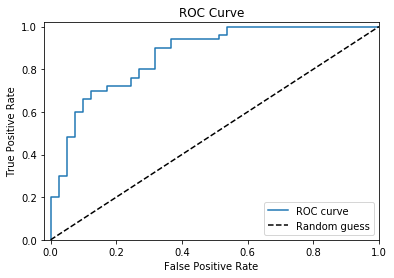

In [60]:
a = model.predict_proba(x_test)[:,1]
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

fpr, tpr, thresholds = roc_curve(y_test,a)
# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

In [61]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,a)

0.8673170731707317

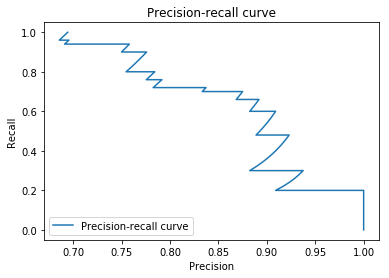

In [62]:
a = model.predict_proba(x_test)[:,1]
#precision_recall_curve
from sklearn.metrics import precision_recall_curve 

precision, recall, thresholds = precision_recall_curve(y_test,a)
# create plot
plt.plot(precision, recall, label='Precision-recall curve')
_ = plt.xlabel('Precision')
_ = plt.ylabel('Recall')
_ = plt.title('Precision-recall curve')
_ = plt.legend(loc="lower left")


In [83]:
from sklearn.metrics import average_precision_score
average_precision_score(y_test,a)

0.7252747252747253

In [85]:
from sklearn.neighbors import KNeighborsClassifier
import time
start = time.time()
end = time.time()
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
print(end - start)

0.0


In [86]:
from sklearn.metrics import classification_report
y=knn.predict(x_test)

In [89]:
knn.score(x_test,y_test)*100

67.03296703296702

In [44]:
print(classification_report(y_test,y))

              precision    recall  f1-score   support

           0       0.66      0.56      0.61        41
           1       0.68      0.76      0.72        50

   micro avg       0.67      0.67      0.67        91
   macro avg       0.67      0.66      0.66        91
weighted avg       0.67      0.67      0.67        91



In [45]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y))

0.6703296703296703


In [28]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y))

[[23 18]
 [12 38]]
